# 20개의 클래스를 세그멘테이션 하는 Enet 사용

In [103]:
import numpy as np
import argparse
import imutils
import time
import cv2
import os
import matplotlib.pyplot as plt

In [104]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data4')

In [105]:
SET_WIDTH = int(600)

In [106]:
normalize_image = 1 / 255.0

In [107]:
resize_image_shape = (1024, 512)

In [108]:
sample_img = cv2.imread('images/example_02.jpg')

In [109]:
sample_img.shape

(512, 1024, 3)

In [110]:
sample_img = imutils.resize(sample_img, width=SET_WIDTH)

In [111]:
# opencv 의 pre trained model 을 통해서, 예측하기 위해서는
# 입력이미지를 blob 으로 바꿔줘야 한다.

In [112]:
blob_img = cv2.dnn.blobFromImage(sample_img, normalize_image, resize_image_shape, 0, swapRB = True, crop=False)

In [113]:
# Enet 모델 가져오기.

In [114]:
cv_enet_model = cv2.dnn.readNet('enet-cityscapes/enet-model.net')

In [115]:
cv_enet_model.setInput(blob_img)

In [116]:
cv_enet_model_output = cv_enet_model.forward()

In [117]:
# 20개의 클래스 각각에 대한 이미지

# 1 : 1개의 이미지를 넣었으므로
# 20 : 클래스의 갯수
# 512 : 행렬의 행의 갯수
# 1024 : 행렬의 열의 갯수
cv_enet_model_output.shape

# 이 안에는 어떤값이 들어있는거냐????

(1, 20, 512, 1024)

In [118]:
# 레이블 이름을 로딩

In [119]:
open('enet-cityscapes/enet-classes.txt').read()

'Unlabeled\nRoad\nSidewalk\nBuilding\nWall\nFence\nPole\nTrafficLight\nTrafficSign\nVegetation\nTerrain\nSky\nPerson\nRider\nCar\nTruck\nBus\nTrain\nMotorcycle\nBicycle\n'

In [120]:
label_values = open('enet-cityscapes/enet-classes.txt').read().split('\n')

In [121]:
label_values = label_values[ : -2+1]

In [122]:
label_values

['Unlabeled',
 'Road',
 'Sidewalk',
 'Building',
 'Wall',
 'Fence',
 'Pole',
 'TrafficLight',
 'TrafficSign',
 'Vegetation',
 'Terrain',
 'Sky',
 'Person',
 'Rider',
 'Car',
 'Truck',
 'Bus',
 'Train',
 'Motorcycle',
 'Bicycle']

In [123]:
IMG_OUTPUT_SHAPE_START = 1 
IMG_OUTPUT_SHAPE_END = 4
classes_num, h, w = cv_enet_model_output.shape[IMG_OUTPUT_SHAPE_START : IMG_OUTPUT_SHAPE_END]

In [124]:
# 원래의 모양인 (1, 20, 512, 1024) 에 있는 값을, 변수로 저장.
# 20은 클래스의 갯수, 512는 높이 1024는 너비로 저장.

In [125]:
class_map = np.argmax(cv_enet_model_output[0], axis = 0)

In [126]:
cv_enet_model_output[0].shape

(20, 512, 1024)

In [127]:
class_map.shape

(512, 1024)

In [128]:
CV_ENET_SHAPE_IMG_COLORS = open('enet-cityscapes/enet-colors.txt').read().split('\n')

In [129]:
# 클래스별로 색정보가 들어있는데, 문자열로 들어있다. 
CV_ENET_SHAPE_IMG_COLORS

['0,0,0',
 '81,0,81',
 '244,35,232',
 '70,70,70',
 '102,102,156',
 '190,153,153',
 '153,153,153',
 '250,170,30',
 '220,220,0',
 '107,142,35',
 '152,251,152',
 '70,130,180',
 '220,20,60',
 '255,0,0',
 '0,0,142',
 '0,0,70',
 '0,60,100',
 '0,80,100',
 '0,0,230',
 '119,11,32',
 '']

In [130]:
# 맨 마지막 따옴표를 없애기
CV_ENET_SHAPE_IMG_COLORS = CV_ENET_SHAPE_IMG_COLORS[ : -2+1]

In [131]:
CV_ENET_SHAPE_IMG_COLORS

['0,0,0',
 '81,0,81',
 '244,35,232',
 '70,70,70',
 '102,102,156',
 '190,153,153',
 '153,153,153',
 '250,170,30',
 '220,220,0',
 '107,142,35',
 '152,251,152',
 '70,130,180',
 '220,20,60',
 '255,0,0',
 '0,0,142',
 '0,0,70',
 '0,60,100',
 '0,80,100',
 '0,0,230',
 '119,11,32']

In [132]:
temp = []

In [133]:
np.array([np.array(color.split(',')).astype('int')  for color in CV_ENET_SHAPE_IMG_COLORS  ])

array([[  0,   0,   0],
       [ 81,   0,  81],
       [244,  35, 232],
       [ 70,  70,  70],
       [102, 102, 156],
       [190, 153, 153],
       [153, 153, 153],
       [250, 170,  30],
       [220, 220,   0],
       [107, 142,  35],
       [152, 251, 152],
       [ 70, 130, 180],
       [220,  20,  60],
       [255,   0,   0],
       [  0,   0, 142],
       [  0,   0,  70],
       [  0,  60, 100],
       [  0,  80, 100],
       [  0,   0, 230],
       [119,  11,  32]])

In [134]:
for color in CV_ENET_SHAPE_IMG_COLORS :
  color_list = color.split(',')      
  color_num_list = np.array(color_list).astype('int')  
  print(color_num_list)
  temp.append(color_num_list)

[0 0 0]
[81  0 81]
[244  35 232]
[70 70 70]
[102 102 156]
[190 153 153]
[153 153 153]
[250 170  30]
[220 220   0]
[107 142  35]
[152 251 152]
[ 70 130 180]
[220  20  60]
[255   0   0]
[  0   0 142]
[ 0  0 70]
[  0  60 100]
[  0  80 100]
[  0   0 230]
[119  11  32]


In [135]:
CV_ENET_SHAPE_IMG_COLORS = np.array(temp)

In [136]:
CV_ENET_SHAPE_IMG_COLORS

array([[  0,   0,   0],
       [ 81,   0,  81],
       [244,  35, 232],
       [ 70,  70,  70],
       [102, 102, 156],
       [190, 153, 153],
       [153, 153, 153],
       [250, 170,  30],
       [220, 220,   0],
       [107, 142,  35],
       [152, 251, 152],
       [ 70, 130, 180],
       [220,  20,  60],
       [255,   0,   0],
       [  0,   0, 142],
       [  0,   0,  70],
       [  0,  60, 100],
       [  0,  80, 100],
       [  0,   0, 230],
       [119,  11,  32]])

In [137]:
class_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
class_map.min()

0

In [139]:
class_map.max()

16

In [140]:
class_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [141]:
# 각 픽셀별로, 클래스에 해당하는 숫자가 적힌 class_map을
# 각 숫자에 매핑되는 색깔로 셋팅해 준것이다.
# 따라서 각 픽셀별 색깔 정보가 들어가게 되었다.
# 2차원 행렬을, 3차원 채널이 있는 RGB 행렬로 만든다.
mask_class_map = CV_ENET_SHAPE_IMG_COLORS[class_map]

In [142]:
mask_class_map

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [143]:
# 리사이즈 한다.

# 인터폴레이션을 INTER_NEAREST 로 한 이유는?? 
# 레이블 정보(0~19) 와 컬러정보 (23,100,243) 는 둘다 int 이므로, 
# 가장 가까운 픽셀 정보와 동일하게 셋팅해주기 위해서.

mask_class_map = cv2.resize(mask_class_map, (sample_img.shape[1], sample_img.shape[0]) , 
           interpolation = cv2.INTER_NEAREST )

In [144]:
class_map = cv2.resize(class_map, (sample_img.shape[1], sample_img.shape[0]) , 
                       interpolation=cv2.INTER_NEAREST)

In [145]:
# 원본이미지랑, 색마스크 이미지를 합쳐서 보여준다.
# 가중치 비율을 줘서 보여준다. 
cv_enet_model_output = ( ( 0.4 * sample_img ) + (0.6 * mask_class_map) ).astype('uint8')

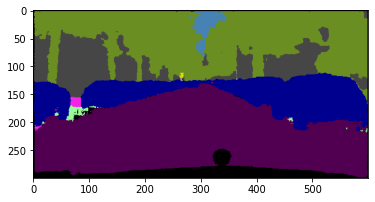

In [146]:
plt.imshow(mask_class_map)

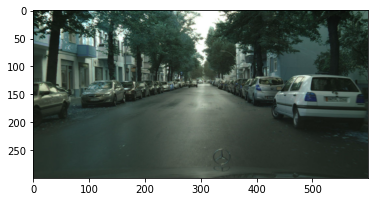

In [147]:
plt.imshow(sample_img)

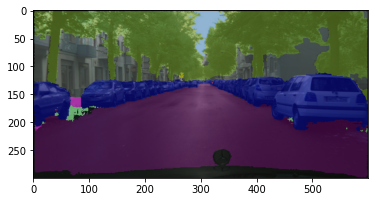

In [148]:
plt.imshow(cv_enet_model_output)

In [150]:
label_values

['Unlabeled',
 'Road',
 'Sidewalk',
 'Building',
 'Wall',
 'Fence',
 'Pole',
 'TrafficLight',
 'TrafficSign',
 'Vegetation',
 'Terrain',
 'Sky',
 'Person',
 'Rider',
 'Car',
 'Truck',
 'Bus',
 'Train',
 'Motorcycle',
 'Bicycle']

In [151]:
CV_ENET_SHAPE_IMG_COLORS

array([[  0,   0,   0],
       [ 81,   0,  81],
       [244,  35, 232],
       [ 70,  70,  70],
       [102, 102, 156],
       [190, 153, 153],
       [153, 153, 153],
       [250, 170,  30],
       [220, 220,   0],
       [107, 142,  35],
       [152, 251, 152],
       [ 70, 130, 180],
       [220,  20,  60],
       [255,   0,   0],
       [  0,   0, 142],
       [  0,   0,  70],
       [  0,  60, 100],
       [  0,  80, 100],
       [  0,   0, 230],
       [119,  11,  32]])

In [155]:
my_legend = np.zeros( ( len(label_values) * 25 ,  300 , 3  )   , dtype='uint8' )
for ( i, (class_name, img_color)) in enumerate( zip(label_values , CV_ENET_SHAPE_IMG_COLORS)) :
  color_info = [  int(color) for color in img_color  ] 
  cv2.putText(my_legend, class_name, (5, (i*25) + 17) , 
              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0) , 2 )
  cv2.rectangle(my_legend, (100, (i*25)), (300, (i*25) + 25) , tuple(color_info), -1)


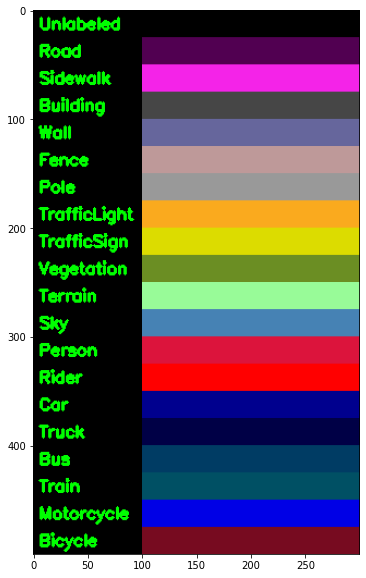

In [157]:
plt.figure(figsize=(10,10))
plt.imshow(my_legend)

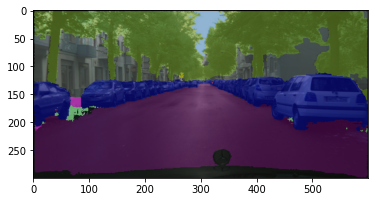

In [158]:
plt.imshow(cv_enet_model_output)

In [159]:
### 비디오 처리

In [160]:
DEFAULT_FRAME = 1

In [161]:
sv = cv2.VideoCapture('video/video.mp4')

In [162]:
sample_video_writer = None

In [163]:
print(sv)

<VideoCapture 0x7fc037594670>


In [164]:
prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() else cv2.CAP_PROP_FRAME_COUNT

In [165]:
prop

7

In [167]:
total = sv.get(prop)

In [ ]:
try :
  prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() else cv2.CAP_PROP_FRAME_COUNT
  total = sv.get(prop)
  print("[INFO] {} total frames in video.".format(total))
except :
  print("[INFO] could not determine number of frames in video")
  total = -1

while True :
  grabbed, frame = sv.read()

  if grabbed == False :
    break

  normalize_image = 1 / 255.0
  resize_image_shape = (1024, 512)
  video_frame = imutils.resize(frame, width=SET_WIDTH)
  blob_img = cv2.dnn.blobFromImage(frame, normalize_image, resize_image_shape, 0, 
                                   swapRB = True, crop = False)
  cv_enet_model.setInput(blob_img)
  # 모델이, 세그멘테이션 추론(예측)하는데 얼마나 걸렸는지 측정.
  start_time = time.time()
  cv_enet_model_output = cv_enet_model.forward()
  end_time = time.time()

  (classes_num, height, width) = cv_enet_model_output.shape[1:4]

  class_map = np.argmax(cv_enet_model_output[0], axis=0)

  mask_class_map = CV_ENET_SHAPE_IMG_COLORS[class_map]

  mask_class_map = cv2.resize(mask_class_map, (video_frame.shape[1], video_frame.shape[0]) ,
             interpolation = cv2.INTER_NEAREST)
  
  cv_enet_model_output = ( (0.3 * video_frame) + (0.7 * mask_class_map) ).astype('uint8')

  print(cv_enet_model_output)




[INFO] 1007.0 total frames in video.
[[[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [68 63 59]
  [68 63 59]
  [68 63 59]]

 [[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [68 63 59]
  [68 63 59]
  [68 63 59]]

 [[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [67 62 58]
  [67 62 58]
  [67 62 58]]

 ...

 [[16 13 13]
  [16 13 13]
  [15 12 12]
  ...
  [26 25 25]
  [32 31 31]
  [30 29 29]]

 [[15 12 12]
  [15 12 12]
  [15 12 12]
  ...
  [24 23 24]
  [33 32 33]
  [32 31 32]]

 [[15 12 12]
  [15 12 12]
  [15 12 12]
  ...
  [25 24 25]
  [37 36 36]
  [36 36 36]]]
[[[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [26 22 18]
  [30 27 23]
  [57 56 52]]

 [[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [27 23 19]
  [27 25 21]
  [57 56 51]]

 [[59 53 47]
  [59 53 47]
  [59 53 47]
  ...
  [28 24 20]
  [25 23 19]
  [56 55 51]]

 ...

 [[16 13 13]
  [16 13 13]
  [16 13 13]
  ...
  [25 24 25]
  [35 34 34]
  [37 36 36]]

 [[16 13 13]
  [16 13 13]
  [15 12 12]
  ...
  [27 26 26]
  [34 33 34]
  [31 30 31]]

 [[15